# First Steps in Neural Network Learning  

Currently, artificial neural networks (ANNs) are one of the hottest topics in machine learning and some of the most widely used tools in data science. In the last years, they have achieved impressive performance in tasks traditionally difficult for artificial intelligence, such as image classification and speech recognition. 

***In this lab, we will learn how to implement simple neural nets using keras.*** We will focus on the so-called feed-forward arquitectures, which are required to build more complicated models. 

## Software and Tools

For this lab, we will use a library specialized in deep learning called Keras. We will also use sklearn, a very complete library for machine learning in Python.  

<table align='left'>
<tr>
<td><img src='http://jricardon.github.io/BBS19lab2Files/figs/keras_logo.png' width='450'/></td>
<td><img src='http://jricardon.github.io/BBS19lab2Files/figs/scikit.png' width='450'/></td>
</tr>
</table>

Please refer to https://keras.io and http://scikit-learn.org/stable/ for help regarding installation and usage.

If you do not want to use GPUs, the following Anaconda commands create an environment with the required software

```
conda create --name LAB python=3.6 pandas scikit-learn matplotlib jupyter
conda activate LAB
conda install -c conda-forge tensorflow keras
conda deactivate LAB
```

If you run the notebook on google colab, all the software you need is already installed.

## Creating Your First Neural Net


### Non-linearly Separable Data

You will start by using a toy classification problem that will allow you to train and evaluate more quickly different architectures and different training methods. The problem will be refered as ``The XOR'' and will consist of bi-dimensional data organized into two classes: red (0) and green (1), with the configuration shown below

<img width='500px' align='left' src='http://jricardon.github.io/BBS19lab2Files/figs/xor.png'>  

Bidimensional data will allow you to easily visualize the classification boundaries learnt by the model.

(10000, 2)
(10000,)
[0 1]
5000
5000


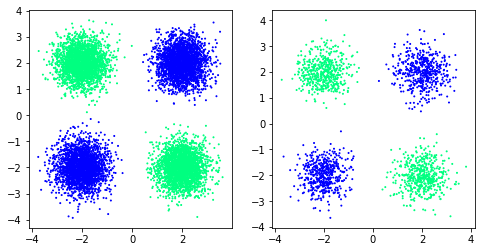

In [2]:
import numpy as np

def do_gaussianXOR(n1=2500,n2=2500, u = 2.0, std = 0.5):
   
    primer_c = np.random.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = np.random.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = np.random.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = np.random.normal(loc=[u,-u],scale=std,size=(n2,2))
    
    X = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2))) 
    #Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
  
    return X, Y.astype(int)
  

X_train,Y_train = do_gaussianXOR()
print(X_train.shape)
print(Y_train.shape)
print(np.unique(Y_train))
print(sum(Y_train==0))
print(sum(Y_train==1))

X_test,Y_test = do_gaussianXOR(n1=500,n2=500)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
axis[1].scatter(X_test[:,0], X_test[:,1], s=1, c=Y_test, cmap=plt.cm.winter)
plt.show()


### Model Definition

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

def create_basic_model_XOR():  
  model = Sequential()
  model.add(Dense(4, input_dim=X_train.shape[1], activation="relu"))
  #model.add(Dense(2, activation="relu"))
  model.add(Dense(1, activation="sigmoid")) #kernel_initializer='orthogonal'
  print(model.summary())
  return model

model = create_basic_model_XOR()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


### Training the Neural Net

In [4]:
model = create_basic_model_XOR()

X_train,Y_train = do_gaussianXOR(u = 1.0, std = 0.25)
X_test,Y_test = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#myopt = Adam(lr=0.01)
myopt = SGD(lr=0.01)

print(X_train.shape)
print(Y_train.shape)

model.compile(optimizer=myopt, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=1)

print("Train Accuracy: ",model.evaluate(X_train,Y_train, batch_size=128, verbose=0)[1])
print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
(10000, 2)
(10000,)
Epoch 1/100
10000/10000 [==============================] - 1s 54us/step - loss: 0.5112 - acc: 0.6913
Epoch 2/100
10000/10000 [==============================] - 0s 31us/step - loss: 0.4538 - acc: 0.8989
Epoch 3/100
10000/10000 [==============================] - 0s 38us/step - loss: 0.4140 - acc: 0.9479
Epoch 4/100
10000/10000 [==============================] - 0s 33us/step - loss: 0.3818 - acc: 0.9609
Epoch 5/100
10000/10000 [==============================] - 0s 34us/step - loss: 0.3533 - acc: 0.

### Predictions and Evaluation


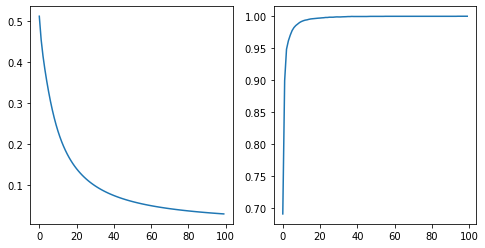

In [7]:
#history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=0)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].plot(history.history['loss'], label='training loss')
axis[1].plot(history.history['acc'], label='training accuracy')
plt.show()


### Monitoring Test or Validation Performance

In [0]:
model = create_basic_model_XOR()

X_train,Y_train = do_gaussianXOR(n1=1000,n2=1000, u = 1.0, std = 0.25)
X_val,Y_val = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)
X_test,Y_test = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#myopt = Adam(lr=0.01)
myopt = SGD(lr=0.01)

print(X_train.shape)
print(Y_train.shape)


model.compile(optimizer=myopt, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=1,validation_data=(X_val,Y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
(4000, 2)
(4000,)
Train on 4000 samples, validate on 2000 samples
Epoch 1/100
4000/4000 [==============================] - 0s 63us/step - loss: 0.9598 - acc: 0.1665 - val_loss: 0.9163 - val_acc: 0.1560
Epoch 2/100
4000/4000 [==============================] - 0s 27us/step - loss: 0.8842 - acc: 0.1618 - val_loss: 0.8495 - val_acc: 0.1640
Epoch 3/100
4000/4000 [==============================] - 0s 28us/step - loss: 0.8233 - acc: 0.1908 - val_loss: 0.7944 - val_acc: 0.2755
Epoch 4/100
4000/4000 [=======================

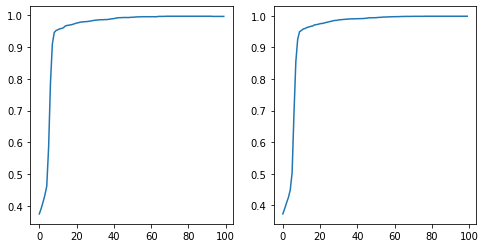

In [0]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].plot(history.history['val_acc'], label='val_acc')
axis[1].plot(history.history['acc'], label='acc')
plt.show()

## Creating a Model for Multi-category Classification

In contrast to SVMs, neural nets do not need heuristic extensions to work with multiple classes. You only need to increase the number of neurons in the output layer and use an activation function that is consistent with the way by which you encode your targets. This model needs to trained with a loss function that takes into account that you have multiple exclusive outputs.   


### Data Loading

For this experiment, you will use the MNIST dataset, a classic database of handwritten digits that is commonly used for training and assessing image processing systems.


<img width='500px' align='left' src='http://jricardon.github.io/BBS19lab2Files/figs/MNIST1.png'>



(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


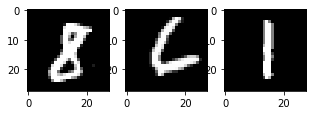

(60000, 784) (60000,)
(10000, 784) (10000,)
[0 1 2 3 4 5 6 7 8 9]


In [14]:
import numpy as np
from keras.datasets import mnist

def load_mnist(flatten=False):
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  print(x_train.shape,y_train.shape)
  print(x_test.shape,y_test.shape)
 
  if flatten:
    x_train = np.reshape(x_train,(len(x_train),x_train.shape[1]*x_train.shape[2]))
    x_test = np.reshape(x_test,(len(x_test),x_test.shape[1]*x_test.shape[2]))

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_mnist()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, frameon=False, figsize=(5, 6))
rand_idx = np.random.randint(0,len(x_train))
img = x_train[rand_idx,:,:]
ax[0].imshow(img,cmap='gray')

rand_idx = np.random.randint(0,len(x_train))
img = x_train[rand_idx,:,:]
ax[1].imshow(img,cmap='gray')

rand_idx = np.random.randint(0,len(x_train))
img = x_train[rand_idx,:,:]
ax[2].imshow(img,cmap='gray')

plt.show()


x_train = np.reshape(x_train,(len(x_train),x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(len(x_test),x_test.shape[1]*x_test.shape[2]))
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(np.unique(y_train))


### Model Definition

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

input_dim_flattened = int(28*28)

def create_basic_model(nh=2):  
  model = Sequential()
  model.add(Dense(nh, input_dim=input_dim_flattened, activation="relu"))
  model.add(Dense(10, activation="softmax")) #kernel_initializer='orthogonal'
  model.summary()
  return model

model = create_basic_model()


from keras.utils import to_categorical
n_classes = 10
y_train = to_categorical(y_train,num_classes=n_classes)
y_test = to_categorical(y_test,num_classes=n_classes)

print(y_train.shape)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
(60000, 10)


### Model Training

In [20]:
x_train, y_train, x_test, y_test = load_mnist(True)
n_classes = 10
y_train = to_categorical(y_train,num_classes=n_classes)
y_test = to_categorical(y_test,num_classes=n_classes)

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(y_train.shape)

myopt = Adam()

model = create_basic_model(100)
model.compile(optimizer=myopt, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)

print("Train Accuracy: ",model.evaluate(x_train, y_train, batch_size=128, verbose=0)[1])
print("Test Accuracy: ",model.evaluate(x_test, y_test, batch_size=128,verbose=0)[1])


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784)
(60000, 10)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3701 - acc: 0.8976
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1747 - acc: 0.9508
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1284 - acc: 0.9634
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1007 - acc: 0.9717
Epoch 5/10
60000/60000 [============

### Predictions and Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(model.evaluate(x_test,y_test))

y_pred = model.predict(x_test)
y_pred_crisp = np.argmax(y_pred, axis=1)
y_test_crisp = np.argmax(y_test, axis=1)

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test_crisp, y_pred_crisp))

print("\nClassification Report\n")
target_names = [str(i) for i in range(10)]
print(classification_report(y_test_crisp, y_pred_crisp, target_names=target_names))


10000/10000 [==============================] - 1s 52us/step
[0.08162814684393815, 0.9748]

Confusion Matrix

[[ 968    0    1    1    0    3    4    1    2    0]
 [   1 1119    4    1    0    1    4    1    4    0]
 [   3    1 1007    7    1    0    3    4    5    1]
 [   0    0    2  997    0    2    0    4    3    2]
 [   0    0    1    1  957    0    9    4    1    9]
 [   3    0    0   13    2  861    6    0    5    2]
 [   4    2    2    1    1    2  945    1    0    0]
 [   0    5    9    7    2    0    0  999    1    5]
 [   3    0    1   22    4    7    5    3  926    3]
 [   2    3    1   12   10    3    2    5    2  969]]

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.97      0.98       982
           

## Visualizing the Role of Hidden Layers

To understand the role of hidden layers, we will attempt to visualize the functions learnt by the different neurons in the model. 

We have seen that each neuron implements a function of the form $g(x)=\sigma(w_1x_1 + w_2x_2 + ... +w_dx_d)$ where $x_1,x_2, ..., x_d$ denote the states of the neighbor neurons, and $\sigma$ is a non-linear activation function (e.g. the logistic). The neurons of the first hidden layer are directly connected to the input layer, that in this case receives 2-dimensional data. So, in this case we can plot $g(x)$ to can examine the type of patterns recognized by the  hidden neurons.

You should observe that each neuron implements a linear discriminant. However, the output neuron in the net can combine the regions defined by the hidden neurons to implement a non-linear classifier of the input data. 

#### Helper Functions

In [0]:
import matplotlib.pyplot as plt
import matplotlib

def visualize_border(model,x,y,prob=0,title="",idx_to_plot=0):
    

    fig, axis = plt.subplots(1, 1,figsize=(12, 6))
    plt.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    cmap3 =  matplotlib.colors.ListedColormap([(127/255, 150/255, 255/255), (142/255, 178/255, 255/255), (181/255, 201/255, 255/255), (214/255, 226/255, 237/255),\
    (242/255, 221/255, 160/255), (242/255, 132/255, 68/255), (229/255, 0/255, 0/255), (1, 163/255, 10/255), (1, 249/255, 20/255), (172/255, 206/255, 100/255), (125/255, 190/255, 84/255)])

    # I want to discretize the colorbar according to values
    vals = [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    norm = matplotlib.colors.BoundaryNorm(vals, cmap3.N)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z[:,idx_to_plot]
    Z = Z.reshape(xx.shape)
    if prob <= 0:
      Z = Z > 0.5

    axis.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
    axis.scatter(x[:,0],x[:,1],s=5,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)

    plt.title(title)
    plt.show()
      
def visualize_border_hidden(model,x,y,n_rows,n_cols,prob=0,title=""):

    fig, axis = plt.subplots(n_rows, n_cols,figsize=(24, 12))
    print(axis.shape)
    counter = 0

    for r in range(n_rows):
        for c in range(n_cols):
            if n_cols > 1:
              current_ax = axis[r,c]
            else:
              current_ax = axis[r]
              
            current_ax.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
            h = .02 # step size in the mesh
            x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
            y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
            print(Z.shape)
            Z = Z[:,counter]
            counter +=1
            Z = Z.reshape(xx.shape)
            if prob <= 0:
              Z = Z > 0.5
            print(Z.shape)
            current_ax.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
            current_ax.scatter(x[:,0],x[:,1],s=2,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)
            #axis.contour(xx, yy, Z,levels=[-1, 0, 1])
        
        plt.title(title)
    
    plt.show()



#### Training

In [24]:
model = create_basic_model_XOR()

X_train,Y_train = do_gaussianXOR(u = 1.0, std = 0.25)
X_test,Y_test = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#myopt = Adam(lr=0.01)
myopt = SGD(lr=0.01)

print(X_train.shape)
print(Y_train.shape)


model.compile(optimizer=myopt, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=0)

print("Train Accuracy: ",model.evaluate(X_train,Y_train, batch_size=128, verbose=0)[1])
print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
(10000, 2)
(10000,)
Train Accuracy:  0.9997
Test Accuracy:  1.0


#### Visualization 

##### Net's Decision

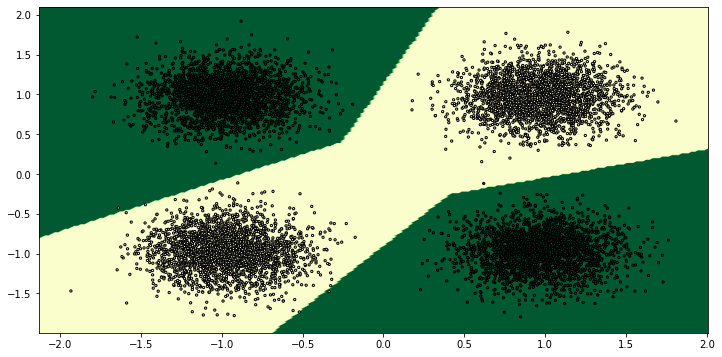

In [26]:

visualize_border(model,X_train,Y_train)


##### Net's Function

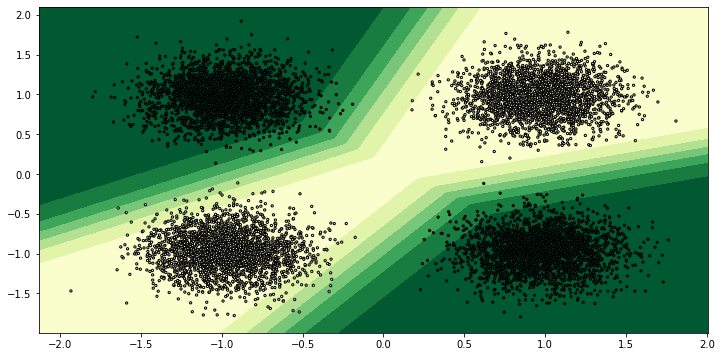

In [27]:
visualize_border(model,X_train,Y_train,prob=1)

##### Hidden Neurons

(2, 2)
(42848, 4)
(206, 208)
(42848, 4)
(206, 208)
(42848, 4)
(206, 208)
(42848, 4)
(206, 208)


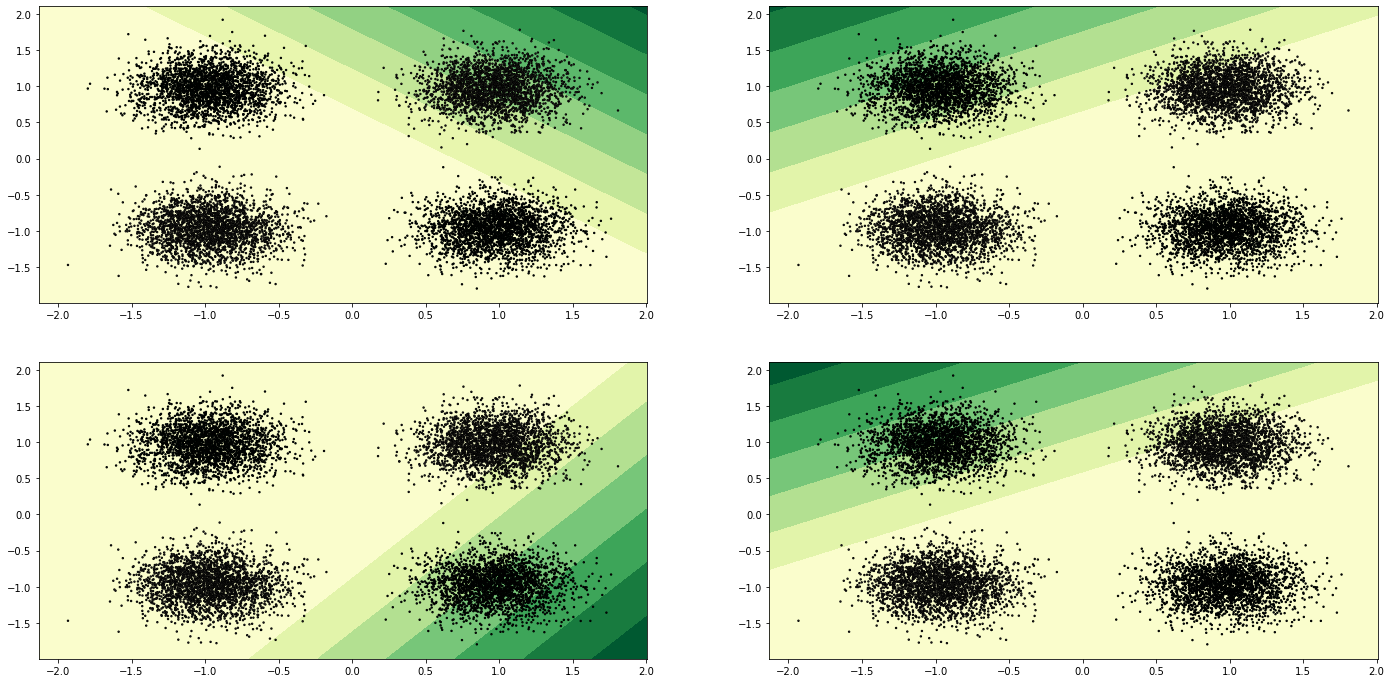

In [28]:
model2 = Sequential()
for layer in model.layers[:-1]: # just exclude last layer from copying
    model2.add(layer)
#model2.summary()

nrows = 2
ncols = 2

visualize_border_hidden(model2,X_train,Y_train,n_rows=nrows,n_cols=ncols,prob=1)

## Effect of the Number of Neurons in the Model

In this section, you have to evaluate the effect of the number of neurons in the model. You should observe that increasing the number of neurons increases the flexibility of the model to learn complex patterns and so to fit the training data. You should also observe however that increasing the net's power make it more prone to overfitting.

You will learn how to monitor and diagnose overfitting in neural network training. First you will use a validation set and then you will learn how to apply $k$-fold cross-validation to this problem.


### More Neurons = More Ability to Fit the Data


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


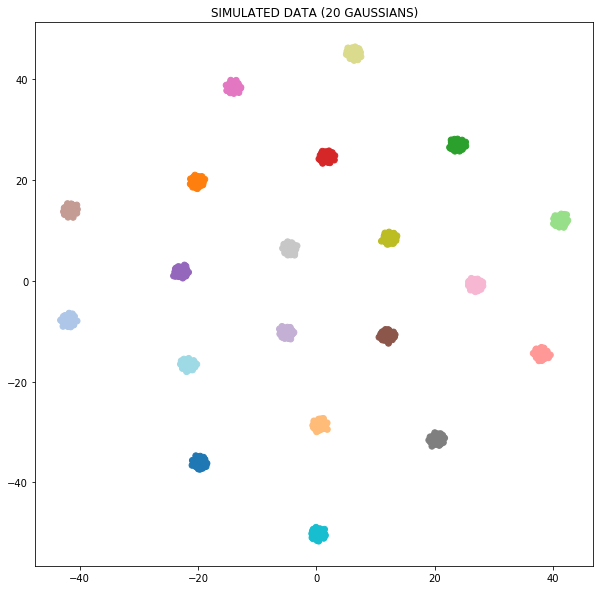

In [29]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 10))
y_color = y/20
ax.scatter(X_embedded[:,0],X_embedded[:,1],c=y_color,cmap=plt.cm.tab20)
ax.set_title("SIMULATED DATA (20 GAUSSIANS)")
plt.show()

y = to_categorical(y)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


SHAPE Y (1000, 20)
SHAPE X (500, 100)
CREATING A NET WITH 10 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:0.050, TEST ACC:0.050
CREATING A NET WITH 30 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:0.058, TEST ACC:0.057
CREATING A NET WITH 50 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:0.106, TEST ACC:0.112
CREATING A NET WITH 100 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:0.224, TEST ACC:0.219
CREATING A NET WITH 200 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:0.518, TEST ACC:0.529
CREATING A NET WITH 400 HIDDEN NEURONS AND 20 OUTPUT NEURONS
TRAIN ACC:1.000, TEST ACC:0.999


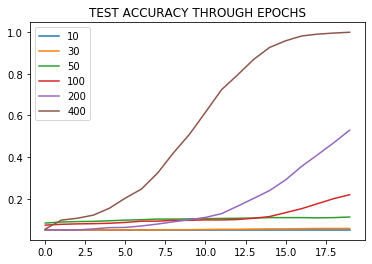

In [31]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import keras
import numpy as np


X, y = make_blobs(n_samples=2000, centers=20, n_features=100, cluster_std=2, random_state=2)

# split into train and test
trainX, testX, trainy, testy = train_test_split(X, y, stratify=y, test_size=0.5)
trainX, valX, trainy, valy = train_test_split(trainX, trainy, stratify=trainy, test_size=0.5)

trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    print("CREATING A NET WITH %d HIDDEN NEURONS AND %d OUTPUT NEURONS"%(n_nodes,n_classes))
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='sigmoid'))
    model.add(Dense(n_nodes, activation='sigmoid'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile model
    opt = SGD()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model on train set
    history = model.fit(trainX, trainy, epochs=20, verbose=0, batch_size=128, validation_data=(testX, testy))
    # evaluate model on test set
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc, train_acc

# evaluate model and plot learning curve with given number of nodes
#num_nodes = [1, 2, 3, 4, 5, 6, 7, 8]
num_nodes = [10, 30, 50, 100, 200, 400]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, acc_test, acc_train = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    
    print('TRAIN ACC:%.3f, TEST ACC:%.3f' % (acc_train, acc_test))
    # plot learning curve
    #pyplot.plot(history.history['acc'], label=str(n_nodes))
    pyplot.plot(history.history['val_acc'], label=str(n_nodes))
    pyplot.title("TEST ACCURACY THROUGH EPOCHS")

    # show the plot
pyplot.legend()
pyplot.show()

### More Neurons = Greater Risk of Overfittinng

For this experiment we will use the IMDB dataset, a well-known collection of  movie reviews used for evaluating natural language processing models.


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 2000) (25000, 2000)
IMDB [0 1]
SHAPE Y (25000, 2)
SHAPE X (20000, 2000)
CREATING A NET WITH 2 HID

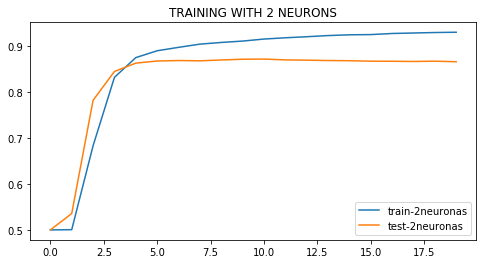

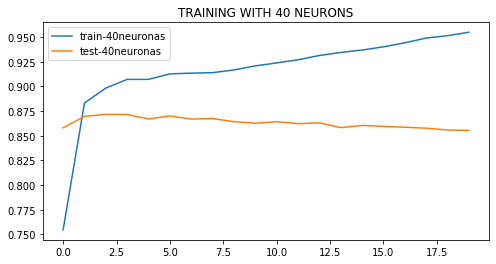

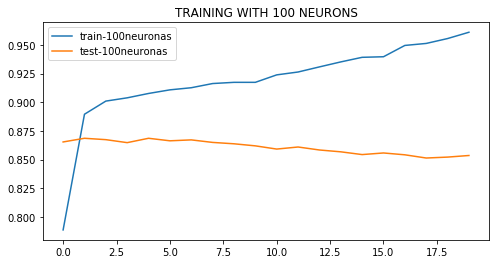

In [32]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb

def bag_of_words(list_words,num_words):
  n = len(list_words)  
  X = np.zeros((n,num_words))
  for idx in range(n):
    for w_idx in list_words[idx]:
      X[idx,w_idx] = 1
  
  return X
  
number_words = 2000
(trainX, trainy), (testX, testy) = imdb.load_data(num_words=number_words)
print(trainX[0])

trainX = bag_of_words(trainX,number_words)
testX = bag_of_words(testX,number_words)

print(trainX.shape,testX.shape)

print("IMDB",np.unique(trainy))

trainX, valX, trainy, valy = train_test_split(trainX,trainy,stratify=trainy,test_size=0.2)
trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

n_epochs = 20

def evaluate_model(n_nodes, trainX, trainy, testX, testy, valX, valy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    print("CREATING A NET WITH %d HIDDEN NEURONS AND %d OUTPUT NEURONS"%(n_nodes,n_classes))
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='sigmoid'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_nodes, activation='sigmoid'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile model
    opt = Adam()
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    history = model.fit(trainX, trainy, epochs=n_epochs, verbose=0, batch_size=128, validation_data=(valX, valy))
   
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_nodes = [2, 40, 100]

for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, acc_test, acc_train = evaluate_model(n_nodes, trainX, trainy, testX, testy, valX, valy)
    
    print('TRAIN ACC:%.3f, TEST ACC:%.3f' % (acc_train, acc_test))
    # plot learning curve
    
    fig, axis = plt.subplots(1, 1, figsize=(8, 4))
    axis.plot([int(i) for i in range(n_epochs)], history.history['acc'], label='train-'+str(n_nodes)+'neuronas')
    axis.plot([int(i) for i in range(n_epochs)], history.history['val_acc'], label='test-'+str(n_nodes)+'neuronas')
    plt.title("TRAINING WITH %d NEURONS"%n_nodes)
    plt.legend()

# show the plot
plt.show()

## Effect of Depth

Now, you have to evaluate the effect of using more or less hidden layers. You will see that increasing the number of layers increases the flexibility of the model much more quickly than increasing the number of neurons. So, in this case is even more important to diagnose overfitting. 

#### On the Toy Dataset

CREATING A NET WITH 1 HIDDEN LAYERS, 5 HIDDEN NEURONS (EACH) AND 20 OUTPUT NEURONS
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.991
CREATING A NET WITH 2 HIDDEN LAYERS, 5 HIDDEN NEURONS (EACH) AND 20 OUTPUT NEURONS
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.981
CREATING A NET WITH 3 HIDDEN LAYERS, 5 HIDDEN NEURONS (EACH) AND 20 OUTPUT NEURONS
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.981
CREATING A NET WITH 4 HIDDEN LAYERS, 5 HIDDEN NEURONS (EACH) AND 20 OUTPUT NEURONS
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.979
CREATING A NET WITH 5 HIDDEN LAYERS, 5 HIDDEN NEURONS (EACH) AND 20 OUTPUT NEURONS
TRAIN ACCURACY: 0.934, TEST ACCURACY. 0.910


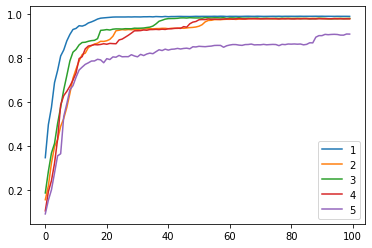

In [33]:
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
X, y = make_blobs(n_samples=10000, centers=20, n_features=100, cluster_std=4, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = 5000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def evaluate_layers(n_layers, n_neurons_per_layer, trainX, trainy, testX, testy):

    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    print("CREATING A NET WITH %d HIDDEN LAYERS OF %d NEURONS (EACH) AND %d OUTPUT NEURONS"%(n_layers,n_neurons_per_layer,n_classes))
    
    model = Sequential()
    model.add(Dense(n_neurons_per_layer, input_dim=n_input, activation='relu')) 
    
    for _ in range(1, n_layers):
        model.add(Dense(n_neurons_per_layer, activation='relu'))
        
    model.add(Dense(n_classes, activation='softmax'))

    opt = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    n_epochs = 100
    history = model.fit(trainX, trainy, epochs=n_epochs, validation_data=(testX, testy), verbose=0, batch_size=64)
    
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    n_h = 5
    history, test_accuracy, train_accuracy = evaluate_layers(n_layers, n_h, trainX, trainy, testX, testy)
    print('TRAIN ACCURACY: %.3f, TEST ACCURACY. %.3f' % (train_accuracy,test_accuracy))
    
    # plot learning curve
    pyplot.plot(history.history['val_acc'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()


#### On the Sentiment Analysis Dataset

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 2000) (25000, 2000)
IMDB [0 1]
SHAPE Y (25000, 2)
SHAPE X (20000, 2000)
CREANDO UNA RED CON 1 CAP

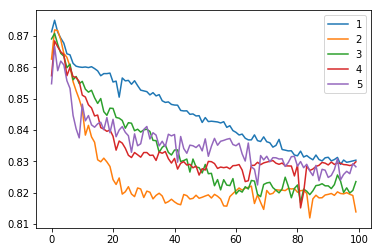

In [0]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import numpy as np

from keras.datasets import imdb

def bag_of_words(list_words,num_words):
  n = len(list_words)  
  X = np.zeros((n,num_words))
  for idx in range(n):
    for w_idx in list_words[idx]:
      X[idx,w_idx] = 1
  
  return X
  
number_words = 2000
(trainX, trainy), (testX, testy) = imdb.load_data(num_words=number_words)
print(trainX[0])

trainX = bag_of_words(trainX,number_words)
testX = bag_of_words(testX,number_words)

print(trainX.shape,testX.shape)

print("IMDB",np.unique(trainy))

trainX, valX, trainy, valy = train_test_split(trainX,trainy,stratify=trainy,test_size=0.2)
trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

n_epochs = 20



def evaluate_layers(n_layers, n_neurons_per_layer, trainX, trainy, testX, testy):

    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    print("CREANDO UNA RED CON %d CAPAS OCULTAS, %d NEURONAS OCULTAS (C/U) Y %d NEURONAS DE SALIDA"%(n_layers,n_neurons_per_layer,n_classes))
    
    model = Sequential()
    model.add(Dense(n_neurons_per_layer, input_dim=n_input, activation='relu')) 
    
    for _ in range(1, n_layers):
        model.add(Dense(n_neurons_per_layer, activation='relu'))
        
    model.add(Dense(n_classes, activation='softmax'))

    opt = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    n_epochs = 100
    history = model.fit(trainX, trainy, epochs=n_epochs, validation_data=(testX, testy), verbose=0, batch_size=64)
    
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    n_h = 5
    history, test_accuracy, train_accuracy = evaluate_layers(n_layers, n_h, trainX, trainy, testX, testy)
    print('TRAIN ACCURACY: %.3f, TEST ACCURACY. %.3f' % (train_accuracy,test_accuracy))
    
    # plot learning curve
    pyplot.plot(history.history['val_acc'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()

## A Challenge

As a homework, you are challenged to solve a more difficult problem: the two concentric spirals!

You have to define your own network and visualize the results.

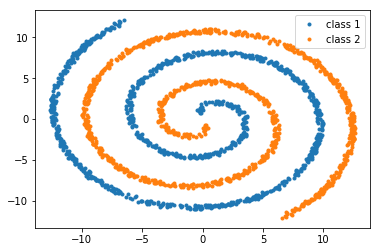

In [0]:
def twospirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000)

plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=10, batch_size=10,  verbose=1)

X_test, y_test = twospirals(1000)


Epoch 1/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6804 - acc: 0.5770
Epoch 2/10
2000/2000 [==============================] - 0s 153us/step - loss: 0.6726 - acc: 0.5855
Epoch 3/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6678 - acc: 0.5925
Epoch 4/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6639 - acc: 0.6075
Epoch 5/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6603 - acc: 0.6035
Epoch 6/10
2000/2000 [==============================] - 0s 164us/step - loss: 0.6557 - acc: 0.6290
Epoch 7/10
2000/2000 [==============================] - 0s 152us/step - loss: 0.6526 - acc: 0.6190
Epoch 8/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6488 - acc: 0.6275
Epoch 9/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6458 - acc: 0.6245
Epoch 10/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6425 - acc: 0.6170


In [0]:
yy = np.round(model.predict(X_test))
print(yy.shape)
yy = np.round(yy)
print(yy.shape)
yy = yy[:,0]
print(yy.shape)
print(np.unique(yy))


(2000, 1)
(2000, 1)
(2000,)
[0. 1.]


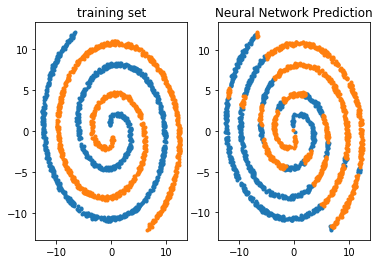

In [0]:
plt.subplot(1,2,1)
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.')
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network Prediction')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()



## Efect of the Learning Rate & Batch Size

In this section you will see the importance of the learning rate for effective neural network training.

Recall that neural networks are trained just like any other machine learning model. You need to specify a learning goal which typically represents a cost and then use an optimization algorithm to find the parameters which minimize that cost. The most common training goal for ANNs is the training error

\begin{align}
E = \frac{1}{n} \sum_\ell Q(f(x^{(\ell)},y^{(\ell)}))
\end{align}

where $(x^{(\ell)},y^{(\ell)})$, $\ell=1,2,\ldots,n$ are the training examples and $Q(f(x^{(\ell)},y^{(\ell)}))$ is a loss function. 

Algorithms to train neural networks are, usually, variants of gradient descent. That, is the weights of the net are optimized using an iterative algorithm, where each iteration improves a little the previous solution, just like in the Perceptron algorithm!

<img src='http://jricardon.github.io/BBS19lab2Files/figs/gradient_descent.pdf' alt="Drawing" style="heigth: 500px;"/>

In the neural network world, each iteration of this algorithm is called _a epoch_. Each epoch works by predicting the values for a subset of examples, computing the loss for these cases, computing the gradient of each weight with respect to the loss and moving the weights in the direction of the negative of the gradient. 

The magnitude of the update is controlled by a parameter known as _the_ _learning_ _rate_.

The number of examples used for a round of prediction and correction is called _the batch size_. An epoch finishes when all the training examples have been used for perfoming corrections.

<table align='left'>
<tr>
<td></td>
<td><img src='http://jricardon.github.io/BBS19lab2Files/figs/forward_pass.pdf' alt="Drawing" style="heigth: 500px;"/></td>
<td><img src='http://jricardon.github.io/BBS19lab2Files/figs/backward_pass.pdf' alt="Drawing" style="heigth: 500px;"/></td>
</tr>
</table>



NUMERO DE CLASES: 10
2.499836836132744
-2.0278362071610654
Tasa de Aprendizaje (Learning Rate) = 100
11.927391052246094
2.5932576656341553
Tasa de Aprendizaje (Learning Rate) = 10
3.602703809738159
2.322754144668579
Tasa de Aprendizaje (Learning Rate) = 1
2.32047176361084
1.3962478637695312
Tasa de Aprendizaje (Learning Rate) = 0.1
2.31976318359375
2.121269941329956
Tasa de Aprendizaje (Learning Rate) = 0.01
2.4569125175476074
2.4328882694244385
Tasa de Aprendizaje (Learning Rate) = 0.001
2.334698438644409
2.332547426223755


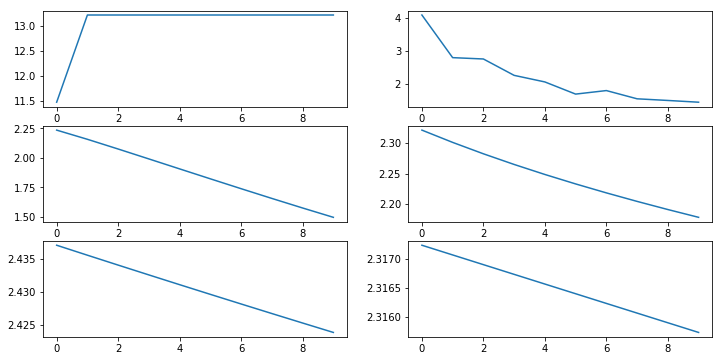

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=10, n_features=10, cluster_std=1, random_state=2)

n_classes = len(np.unique(y))
print("NUMBER OF CLASSES: %d"%n_classes)

y = to_categorical(y)

n_train = 50
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

print(np.max(trainX))
print(np.min(trainX))

def create_ann(n_h):
  model = Sequential()
  model.add(Dense(n_h, input_dim=trainX.shape[1], activation="sigmoid"))
  model.add(Dense(n_classes, activation="softmax"))
  return model
   
n_h = 20
n_epochs = 10
fig, axis = plt.subplots(3, 2, figsize=(12, 6))
axs = axis.reshape(-1)

learning_rates = [100, 10, 1, 0.1, 0.01, 0.001]

for i in range(len(learning_rates)):
  
  model = create_ann(n_h)
  opt=SGD(lr=learning_rates[i],decay=0, momentum=0, nesterov=False)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  print("Learning Rate = %g"%learning_rates[i])
  history = model.fit(trainX, trainy, epochs=n_epochs, batch_size=len(trainX), verbose=0, validation_data=(testX,testy))
  axs[i].plot(history.history['val_loss'], label=str(learning_rates[i]))
  train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
  test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
  print(np.max(history.history['loss']))
  print(np.min(history.history['loss']))
  #axs[i].set_ylim(0, 1)
  
plt.show()

#check momentums
momentums = [0.0, 0.5, 0.9, 0.99]

2.6120866983313116
-2.8938378068872046
EPOCH 0
EPOCH 1
EPOCH 2
EPOCH 3
EPOCH 4
EPOCH 5
EPOCH 6
EPOCH 7
EPOCH 8
EPOCH 9


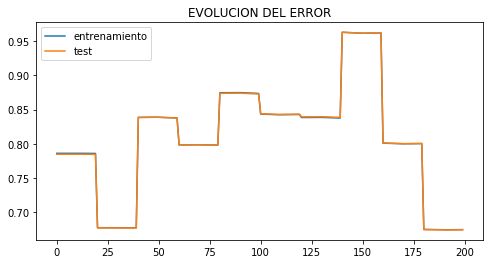

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np

def do_gaussians(n1=2500,n2=2500, u = 1.0, std = 0.5):
   
    primer_c = np.random.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = np.random.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = np.random.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = np.random.normal(loc=[u,-u],scale=std,size=(n2,2))
    
    X = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y = np.hstack((np.ones(n1),np.ones(n2),np.zeros(n1),np.zeros(n2))) 
  
    return X, Y.astype(int)
    
trainX, trainy = do_gaussians(n1=500,n2=500)
valX, valy = do_gaussians(n1=500,n2=500)
testX, testy = do_gaussians(n1=500,n2=500)

n_classes = 2

print(np.max(trainX))
print(np.min(trainX))

def create_ann(n_h):
  model = Sequential()
  model.add(Dense(n_h, input_dim=trainX.shape[1], activation="sigmoid"))
  model.add(Dense(1, activation="sigmoid"))
  return model
   
n_h = 20

n = len(trainX)
n_epochs = 10
batch_size = 100

train_history = []
test_history = []

for epoch in range(n_epochs):
    print("EPOCH", epoch)
    n_mini_batches = n/batch_size
    model = create_ann(n_h)
    opt=SGD(lr=0.0001)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    for idx_mini_batch in range(int(n_mini_batches)):
      X_batch = trainX[int(idx_mini_batch*batch_size):int((idx_mini_batch+1)*batch_size),:]
      Y_batch = trainy[int(idx_mini_batch*batch_size):int((idx_mini_batch+1)*batch_size)]
      model.train_on_batch(X_batch, Y_batch)
      train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
      test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
      train_history.append(train_loss)
      test_history.append(test_loss)
      
fig, axis = plt.subplots(1, 1, figsize=(8, 4))
axis.plot(train_history,label='entrenamiento')
axis.plot(test_history,label='test')
plt.title("EVOLUCION DEL ERROR")
plt.legend()
plt.show()

